In [2]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'D:/Internship-1/CodeClause/Task/Task-4 Plant_Disease/Dataset/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

In [4]:
model = tf.keras.models.load_model('trained_model.keras')

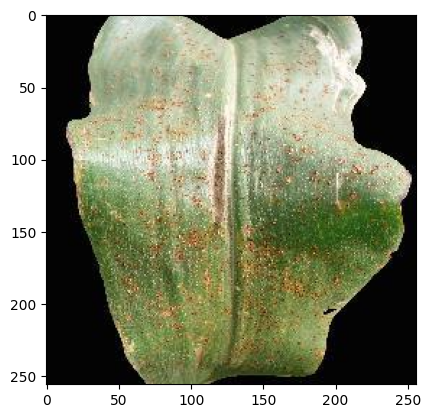

In [15]:
image_path = 'D:/Internship-1/CodeClause/Task/Task-4 Plant_Disease/Dataset/test/CornCommonRust2.JPG'
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

plt.imshow(img)

In [16]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) 
predictions = model.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


In [17]:
print(predictions)

[[1.46458786e-13 1.19966877e-14 3.89686269e-16 7.21356088e-17
  2.08413134e-15 2.93405674e-14 8.80752448e-14 3.18164792e-13
  1.00000000e+00 1.55448895e-15 7.71835341e-13 1.69825474e-17
  7.58046376e-14 1.33197982e-16 9.72016215e-19 1.01796653e-15
  1.94498755e-13 7.14536679e-17 2.06297365e-14 2.77632942e-15
  3.67150998e-13 2.37308553e-19 9.50603223e-15 8.40630238e-17
  3.10890103e-16 6.51663226e-18 6.56222106e-14 1.18342269e-16
  2.63238365e-19 2.97312197e-12 5.83256909e-09 7.31596121e-16
  1.51502583e-14 2.89615093e-20 4.65376577e-17 2.03733460e-17
  1.01837624e-19 5.02064909e-16]]


In [18]:
result_index = np.argmax(predictions)
print(result_index)

8


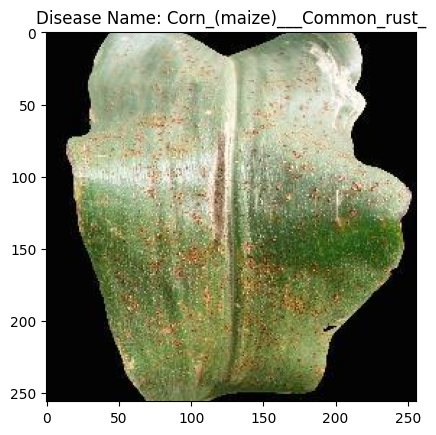

In [19]:
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.show()
plt.xlabel(model_prediction)